# Real Estate Web Scraper + Analysis

In [55]:
#Import Libraries
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import random
from datetime import date

In [56]:
#Get Website Test
class homescraper():
    
    #url = 'https://www.zillow.com/new-york-ny/fsbo/'
    results = {"Address" : [], "Price" : [], "Sqft" : [], "Bedrooms" : [], 'Bathrooms' : []}

    def fetch(self, url, params):
        #manual override header data
        headers = {
            'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.9',
            'cache-control': 'max-age=0',
            'cookie': 'zguid=23|%24d14f0059-d03b-4422-9f57-5862fcd13490; _ga=GA1.2.1741285320.1590755697; zjs_user_id=null; zjs_anonymous_id=%22d14f0059-d03b-4422-9f57-5862fcd13490%22; __gads=ID=1050523ba93d593d:T=1590755700:S=ALNI_MZlJJ_xqSbd51oJisV_HY4g017Ehw; _gcl_au=1.1.2000298647.1590755705; KruxPixel=true; _fbp=fb.1.1590755705919.1815197270; _pxvid=d6c5ec75-a1a8-11ea-b8a9-0242ac120009; KruxAddition=true; JSESSIONID=3E7EBDB1F8931DF7D0DE9992546AE0B3; zgsession=1|200e23e0-9534-4d27-931f-caa3de6b483b; _gid=GA1.2.1328942480.1590858452; _gat=1; DoubleClickSession=true; GASession=true; _uetsid=fdde22d5-862a-8a7d-93e4-a16c574edf91; _pin_unauth=YzUyOGQ2OGMtMmQ3YS00NGZkLTg3MmEtOGJlODM1YWMwMTA1; _px3=026336d3721eec42bcdec3278ad2d3ac2014d5e65707b21624fb2e743d9a89be:mq3WRz2RNL5PBIvbYNHCxq5VfXHXy2YKC+8Lqn97pIw8MiKppH7Cx7AjKzbAFi1zcehKGY36aIgsnE9NiPKwlw==:1000:4U1o3ogIQ0KzfyMd2QYEFGDnD1augezy5bJlzEn9ZHE89B2uEIxDg8BmsGj8szPwyIz1Yv15S2V0TV5P+0jCFisfGk92XM4DM7K13GCtNr0HXhNGftVBFxVrCv8ApRphw/Qwj7AcagCh9i6FPiQGLFruxVASJXLsNpFeWimekVY=; AWSALB=ZKAGBcH2BwM6D1bRKOPynbOqyclySGz5U/fZB+wO3MYQ91UR9A5rFVtFsmjOkrMASUJguhtsJRZDM7IlBiWVT/pGw2S0BjxgEZmpFPrBZEqU2lWTE2NMArtecZD2; AWSALBCORS=ZKAGBcH2BwM6D1bRKOPynbOqyclySGz5U/fZB+wO3MYQ91UR9A5rFVtFsmjOkrMASUJguhtsJRZDM7IlBiWVT/pGw2S0BjxgEZmpFPrBZEqU2lWTE2NMArtecZD2; search=6|1593450465587%7Crect%3D40.843698984643765%252C-73.50417109960938%252C40.567821651427245%252C-74.45174190039063%26rid%3D6181%26disp%3Dmap%26mdm%3Dauto%26p%3D2%26z%3D0%26lt%3Dfsbo%26fs%3D1%26fr%3D0%26mmm%3D0%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%096181%09%09%09%09%09%09',
            'sec-fetch-dest': 'document',
            'sec-fetch-mode': 'navigate',
            'sec-fetch-site': 'same-origin',
            'sec-fetch-user': '?1',
            'upgrade-insecure-requests': '1',
            'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'
        }
        response = req.get(url, headers = headers, params = params)
        #Request test
        return(response)

    def parse(self, response):
        soup = bs(response.content, 'html.parser')
        #print(soup)
        deck = soup.find('ul', {'class': 'photo-cards photo-cards_wow photo-cards_short'})
        for card in deck.contents:
            script = card.find('script', {'type': 'application/ld+json'})
            if script:
                #print(script)
                script_json = json.loads(script.contents[0])
                self.results["Address"].extend(card.find('address', {"class" : "list-card-addr"}))
                
                price = card.find("div", {"class" : "list-card-price"})
                #print(price.text)
                price_clean = price.text.strip("$")
                price_clean = price_clean.replace(",", "")
                #print(price_clean)
                self.results["Price"].append(int(price_clean))
                
                bed = card.find("ul", {"class" : "list-card-details"}).find_all('li')[0]
                bed_clean = bed.text.strip(" bds")
                if bed_clean == "Studio":
                    self.results["Bedrooms"].append(0)
                else:                    
                    self.results["Bedrooms"].append(int(bed_clean))
                    
                bath = card.find("ul", {"class" : "list-card-details"}).find_all('li')[1]
                bath_clean = bath.text.strip(" ba")
                if bath_clean == "0":
                    self.results["Bathrooms"].append(0)
                else:
                    self.results["Bathrooms"].append(int(bath_clean))
                    
                area = card.find("ul", {"class" : "list-card-details"}).find_all('li')[2]
                area_clean = area.text.strip(" sqft")
                area_clean = area_clean.replace(",", "")
                if area_clean == "--":
                    self.results["Sqft"].append(None)
                else:
                    self.results["Sqft"].append(int(area_clean))

    #int number of pages you want to scrape
    def run(self):
        url = 'https://www.zillow.com/new-york-ny/fsbo/'
        pages = 2
        res_list = []

        for page in range(1, pages + 1):
            params = {
                        'searchQueryState': '{"pagination":{"currentPage": %s},"mapBounds":{"west":-74.40093013281245,"east":-73.55498286718745,"south":40.4487909557045,"north":40.96202658306895},"regionSelection":[{"regionId":6181,"regionType":6}],"isMapVisible":false,"filterState":{"isForSaleByAgent":{"value":false},"isNewConstruction":{"value":false},"isForSaleForeclosure":{"value":false},"isComingSoon":{"value":false},"isAuction":{"value":false}},"isListVisible":true}' %page
                    }    
            response = self.fetch(url, params)
            self.parse(response)
            res_list.append(response)
            time.sleep(random.randint(2,6))
        print(res_list)
                        
if __name__ == '__main__':
    scraper = homescraper()
    scraper.run()

[<Response [200]>, <Response [200]>]


In [ ]:
#Test print scraper dictionary
#print(scraper.results)

In [57]:
df = pd.DataFrame.from_dict(scraper.results)
df

,Address,Price,Sqft,Bedrooms,Bathrooms
0,"419 W 55th St APT 4C, New York, NY 10019",1150000,1300.0,2,2
1,"128 Central Park S #11C, New York, NY 10019",1495000,912.0,2,2
2,"320 E 42nd St APT 205, New York, NY 10017",319000,350.0,0,1
3,"19 Fiske Pl APT C4, Brooklyn, NY 11215",995000,NaN,2,1
4,"116 Pinehurst Ave APT D33, New York, NY 10033",829000,NaN,2,1
5,"72 Mercer St APT 4W, New York, NY 10012",4700000,2133.0,2,2
6,"230 Ashland Pl APT 20C, Brooklyn, NY 11217",1300000,1200.0,2,2
7,"131 W 28th St APT 6A, New York, NY 10001",1375000,900.0,1,1
8,"920 E 17th St APT 616, Brooklyn, NY 11230",650000,1300.0,2,2
9,"130 Lenox Ave APT 206, New York, NY 10026",597500,NaN,2,1


In [6]:
today = date.today()
file_name = '{}_Home Results.csv'.format(today)
#print(file_name)
df.to_csv(file_name)

#Create Pandas data frame from dictionary
df = pd.DataFrame.from_dict(df_dict)
average_ratings = df.groupby("Company").Rating.mean()
top_ten = average_ratings.nlargest(10)
print(top_ten)

#Scatterplot for perecentage of Cacao to ratings, using NumPy to approximate line
plt.clf()
plt.scatter(df.CacaoPercentage, df.Rating)
z = np.polyfit(df.CacaoPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CacaoPercentage, line_function(df.CacaoPercentage), "r--")
plt.show()

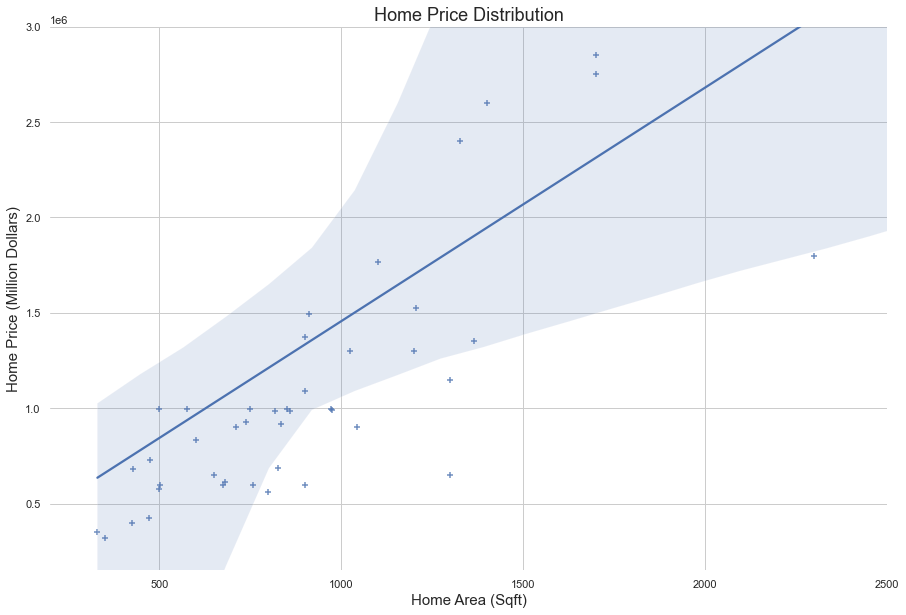

In [68]:
#Price scatterplot
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
sns.regplot(
    data=df, x="Sqft", y="Price", color="b", marker = "+"
)
ax.set_xlim(left=200, right=2500)
ax.set_ylim(bottom=150000, top=3000000)
ax.set_xlabel('Home Area (Sqft)', fontsize = 15)
ax.set_ylabel('Home Price (Million Dollars)', fontsize = 15)
ax.set_title('Home Price Distribution', fontsize = 18)

plt.show()

In [8]:
#Find the average price for point in time.
price_total = 0
for price in df.Price:
    np = price.strip("$")
    np = np.replace(",", "")
    #print(np)
    price_total += float(np)
print("The average price of homes on {} is: ${}".format(today, round(price_total/len(df.Price), 2)))

The average price of homes on 2021-03-22 is: $1867645.16


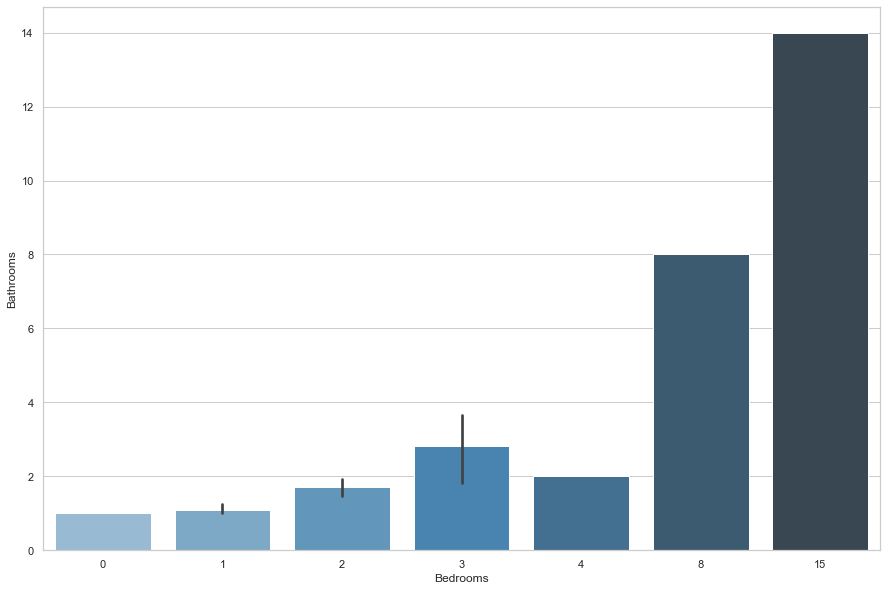

In [59]:
#Bathrooms to Bedrooms Count
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(
    data = df, y = "Bathrooms", x = "Bedrooms", palette="Blues_d"
)
plt.show()